# TP 1

## 1. Importations

In [291]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## 2. Chargement des donnees

In [292]:
data1 = pd.read_csv('Data/USA_Housing.csv')
data1


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [293]:
data = data1[['Avg. Area Income', 'Price']]
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# X = data.iloc[:, 1:2].values
# Y = data.iloc[:, 5:6].values
# Y = Y[:, -1]

In [294]:
Y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

## Separation des donnees

In [295]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

x_train.shape

(3750, 1)

In [296]:
y_test.shape

(1250,)

## Construction du modele

In [297]:
modele_lineaire = LinearRegression()


In [298]:
## Entrainement du modele

In [299]:
modele_lineaire.fit(X, Y)

LinearRegression()

## Prediction

In [300]:
y_prix_predits = modele_lineaire.predict(x_test)

y_prix_predits

array([1376383.64379681, 1598098.30503477, 1379480.57417563, ...,
       1089892.65335026, 1438425.63638036, 1387341.46991986])

In [301]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ])

## Comparaison

In [302]:
resultat = pd.DataFrame({'Prix reels': y_test, 'Prix predits': y_prix_predits, 'Difference': y_test-y_prix_predits})
resultat

,Prix reels,Prix predits,Difference
0,1.435770e+06,1.376384e+06,59386.125041
1,1.668448e+06,1.598098e+06,70349.793022
2,1.762215e+06,1.379481e+06,382734.105406
3,1.106261e+06,1.118690e+06,-12428.774634
4,1.051124e+06,9.970999e+05,54023.899109
...,...,...,...
1245,7.054441e+05,9.360804e+05,-230636.312218
1246,1.358647e+06,1.633168e+06,-274521.240513
1247,9.750058e+05,1.089893e+06,-114886.879690
1248,1.393996e+06,1.438426e+06,-44429.674552


## Evaluation du modele

In [303]:
### mean_squared_error

In [304]:
print('MSE de la Regression Lineaire:', mean_squared_error(y_test, y_prix_predits))

MSE de la Regression Lineaire: 70279641901.66084


In [305]:
### r2_score

In [306]:
print('r2_score de la Regression Lineaire:', r2_score(y_test, y_prix_predits))

r2_score de la Regression Lineaire: 0.4337534140294451


## Visualisation

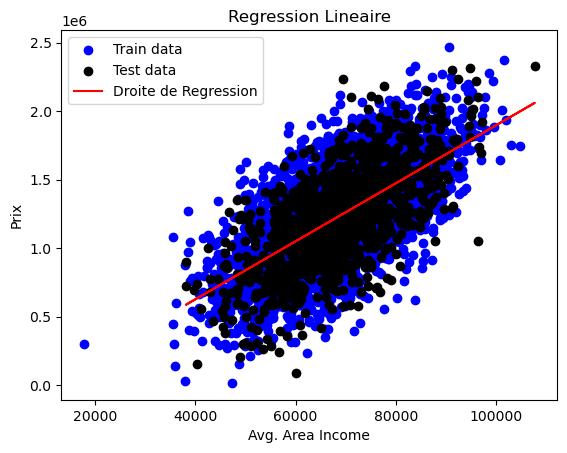

In [307]:
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='black', label='Test data')
plt.plot(x_test, y_prix_predits, color='red', label='Droite de Regression')
plt.xlabel('Avg. Area Income')
plt.ylabel('Prix')
plt.title('Regression Lineaire')
plt.legend()
plt.show()

## Prediction simple

In [308]:
print(modele_lineaire.predict([[79545.458574]]))

[1464424.95040289]
